# Homework 22
#### Section 4.5
#### Logan Schelly
#### 24 October 2019

In [1]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

string_I_made_up = 'cglover52'
rand_int = int(string_I_made_up, base=36) % 2**32
np.random.seed(rand_int)

## Exercise 4.23
Given a random varialbe $X \sim F$ with $\mathbb{E}[X] = \mu$, let $\theta = e^{\mu}$ be the quantity we desire to approximate.  For a sample $X_1, \ldots, X_{10}$, let $T(X_1,\ldots, X_{10}) = e^{\hat{\mu}_{10}}$ be the natural estimator for $\theta$.

#### Part (i)
Numerically draw draw $\mathbf{x} = (x_1, \ldots, x_{10})$ of length $10$ from a standard normal distribution (so $\mu = 0$), and compute $\hat{\theta} = T(x_1, \ldots, x_{10})$.

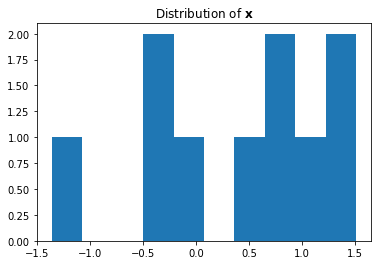

This is theta hat: 1.466667084601281


In [2]:
def T(x):
    """
    This function represents the statistic they're having us calculate.
    """
    return np.exp(np.mean(x))

x = np.random.normal(0, 1, 10)
theta_hat = T(x)

#Visualize how x is distributed.
plt.hist(x)
plt.title("Distribution of $\mathbf{x}$")
plt.show()
print("This is theta hat:", theta_hat)

#### Part (ii)
Draw $\mathbf{y} = (y_1, \ldots, y_{10})$ from the empirical distribution $\hat{F}$ by choosing $y_i$ with replacement from the original data set $x_1, \ldots, x_{10}$ and compute $t_1 = T(y_1, \ldots, y_{10})$.

In [3]:
y = np.random.choice(x, size=10, replace=True)
t = T(y)
print("This is t1:", t)

This is t1: 1.5923240084179358


Repeat this $R = 1000$ times to produce $t_1, \ldots, t_R$.

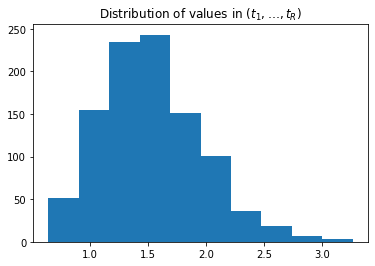

In [4]:
R = 1000

#Find the other R-1 samples for y.
other_ys = np.random.choice(x, size=(R-1, 10)) #Each row is another sample.
y = np.vstack((y, other_ys))
t = np.apply_along_axis(T, 1, y) #Take each row and apply T.

#Visualize what t looks like.
plt.hist(t)
plt.title("Distribution of values in $(t_1, \ldots, t_R)$")
plt.show()

#### Part (iii)
Compute $\bar{t} = \frac{1}{R}\sum_{i=1}^{R}t_i$.

In [5]:
t_bar = t.mean()
print("This is t bar:", t_bar)

This is t bar: 1.5339947269863978


#### Part (iv)
Compute the Monte Carlo (bootstrap) estimate 
$$
\text{Var}_{\hat{F}}(T) \approx \text{Var}_{\hat{F}}^B(T) = \frac{1}{R-1}\sum_{r=1}^{R}(t_r - \hat{t})^2
$$
and the bootstrap estimate of the standard error
$$
\hat{se} \approx \sqrt{ \text{Var}_{\hat{F}}^B(T)}.
$$

In [6]:
MC_estimate = t.var(ddof=1)
boot_se = np.sqrt(MC_estimate)
print("Monte Carlo estimate of variance:", MC_estimate)
print("Bootstrap estimate of standard error:", boot_se)

Monte Carlo estimate of variance: 0.18468854846010818
Bootstrap estimate of standard error: 0.4297540557808712


#### Part (v)
Assume that $T$ is approximately normally distributed as $\mathscr{N}(\hat{\theta}, \text{Var}_{\hat{F}}(T))$, and use that assumption to find a $95\%$ confidence interval for $\theta$ that is symmetric around $\hat{\theta}$.

In [7]:
Taprx = stats.norm(theta_hat, boot_se) #Approximate distribution of T.
alpha = (100 - 95)/100
a = Taprx.ppf(alpha/2) #Inverse of cdf at alpha/2.
b = Taprx.isf(alpha/2) #Inverse of survival function at alpha/2.
print("The 95% confidence interval is ({0:1.4f}, {1:1.4f})".format(a, b))

The 95% confidence interval is (0.6244, 2.3090)


Does the true value of $\theta$ lie in the interval?

In [8]:
mu = 0
theta = np.exp(mu)
print("Yes" if ((a<theta) and (theta<b)) else "No")

Yes


#### Part (vi)
Of course, $T$ is not even close to being normally distributed.  Find the sample 2.5-percentile and 97.5-percentile for the draw $t_1, \ldots, t_r$, and give the corresponding bootstrap 0.95-confidence interval for $\theta$.  Compare the result to the interval generated in the previous step.

In [9]:
a_boot, b_boot = np.percentile(t, [2.5, 97.5])
print("The bootstrap 0.95 confidence interval is ({0:1.4f}, {1:1.4f})".format(a_boot, b_boot))

The bootstrap 0.95 confidence interval is (0.8436, 2.4885)


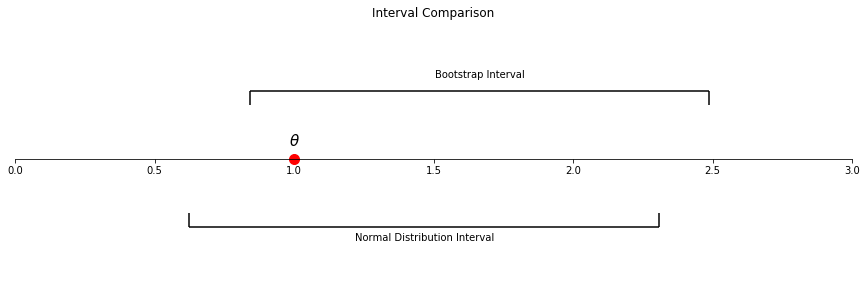

In [10]:
plt.figure(figsize=(15, 5))
plt.xlim((0,3))
plt.ylim((-1, 1))

boot_height = 0.5
norm_height = -0.5
tick_length = .1

#Draw the Bootstrap interval
plt.hlines(boot_height, a_boot, b_boot)
plt.vlines(a_boot, boot_height, boot_height - tick_length)
plt.vlines(b_boot, boot_height, boot_height - tick_length)
plt.annotate("Bootstrap Interval", 
             (np.mean((a_boot, b_boot)), boot_height+.1), 
             horizontalalignment='center')

#Draw the normal-based interval.
plt.hlines(norm_height, a, b)
plt.vlines(a, norm_height, norm_height + tick_length)
plt.vlines(b, norm_height, norm_height + tick_length)
plt.annotate("Normal Distribution Interval", 
             (np.mean((a, b)), norm_height-.1), 
             horizontalalignment='center')

#Move the spines so that it looks like a number line.
ax = plt.gca()#Get the current axis.
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.set_yticks([])

#Mark the true value we're making an interval for.
ax.plot(theta, 0, 'o', color='red', markersize=10)
ax.annotate(r'$\theta$', (theta, .1), horizontalalignment='center', fontsize=15)

plt.title("Interval Comparison")
plt.show()